# Clustering

TODO: write.<br> 
Load (X, Y, F) for 6 tags 'python',... and apply Classification Pipelines.<br>
Pipeline: (pca, lda, svd, nmf) --> (agglo, kmeans, lda, gmm, dbscan) --> plotgrid(decomp x clusteralgo). <br>
Inputfiles are from ...nlpvec/ output is written to ...nlpvec/decomposition/ and ..nlpvec/clustering/. see decomposition and clustering

| Name | Data Type                           | Description                             | Comment |
|------| :---                                |-----------------------------------------|--------|
| $s$  | $\in \mathbb{N}$                    | Number Samples                          | random 2000   |
| $t$  | $\in \mathbb{N}$                    | Number of terms                         | reduced by projection |
| $q$  | $\in \mathbb{S}$                    | Analysed tags (labels)                  | ['android'] |
| $F$  | $\in \mathbb{S}^{t}_{q}$            | Feature names                           | useless     |
| $Y$  | $\in \mathbb{B}^{s}_{q}$            | Actual classes                          | just for visualisations |
| $X$  | $\in \mathbb{R}^{s \times t}_{q}$   | tf-idf                                  | transformed  |


find most simmilar to Y(q).

## Decomposition
TODO: write.<br> 

* $t \in \mathbb{N} \longmapsto t_{r} \in \mathbb{N}$
* $F \in \mathbb{S}^{t}_{q} \longmapsto F \in \mathbb{S}^{t_{r}}_{q}$ 
* $X \in \mathbb{R}^{s \times t}_{q} \longmapsto X_{r} \in \mathbb{R}^{s \times t_{r}}_{q}$

internal dimension is for all projections the same,<br>
but varies with cluster algo.
most use 25, except DBscan, it used 5. Db scan has problems with dim > 50 in general.


In [9]:
import cluster, src.algo.cell2string

tfidf       = slice('11', '32')
htmlfeature = ['TB']
algo        = ['PCA', 'LDA']
dims        = ['2', '3', '4', '6', ]

inputspace = cluster.DecompositionFrame().sort_index().sort_index(axis=1)
decompplan = inputspace.loc[('stackoverflow', 'lemma', 'nltk', tfidf, htmlfeature, algo, dims), :]
decompplan = src.algo.cell2string.file2date(decompplan)
decompplan

$r_{c}$ $r_{f}$  \
source        wordtype vecimpl tf-idf htmlfeature algo dim                   
stackoverflow lemma    nltk    11     TB          LDA  2         -       -   
                                                       3         -       -   
                                                       4         -       -   
                                                       6         -       -   
                                                  PCA  2         -       -   
                                                       3         -       -   
                                                       4         -       -   
                                                       6         -       -   
                               30     TB          LDA  2         -       -   
                                                       3         -       -   
                                                       4         -       -   
                                                       6         -       -   
                                                  PCA  2         -       -   
                                                       3         -       -   
                                                       4         -       -   
                                                       6         -       -   
                               31     TB          LDA  2         -       -   
                                                       3         -       -   
                                                       4         -       -   
                                                       6         -       -   
                                                  PCA  2         -       -   
                                                       3         -       -   
                                                       4         -       -   
                                                       6         -       -   
                               32     TB          LDA  2         -       -   
                                                       3         -       -   
                                                       4         -       -   
                                                       6         -       -   
                                                  PCA  2         -       -   
                                                       3         -       -   
                                                       4         -       -   
                                                       6         -       -   

                                                           $r_{s}$  C  F  R  \
source        wordtype vecimpl tf-idf htmlfeature algo dim                    
stackoverflow lemma    nltk    11     TB          LDA  2         -  -  -  -   
                                                       3         -  -  -  -   
                                                       4         -  -  -  -   
                                                       6         -  -  -  -   
                                                  PCA  2         -  -  -  -   
                                                       3         -  -  -  -   
                                                       4         -  -  -  -   
                                                       6         -  -  -  -   
                               30     TB          LDA  2         -  -  -  -   
                                                       3         -  -  -  -   
                                                       4         -  -  -  -   
                                                       6         -  -  -  -   
                                                  PCA  2         -  -  -  -   
                                                       3         -  -  -  -   
                                                       4         -  -  -  -   
                                                       6       

## Unsupervised Algorithms

TODO: write.<br> 
applied to each composition

Plot rrecision recall for each tag❌algo.

FloatProgress(value=0.0, max=4.0)

(10214, 1367) (10214,) (1367,)


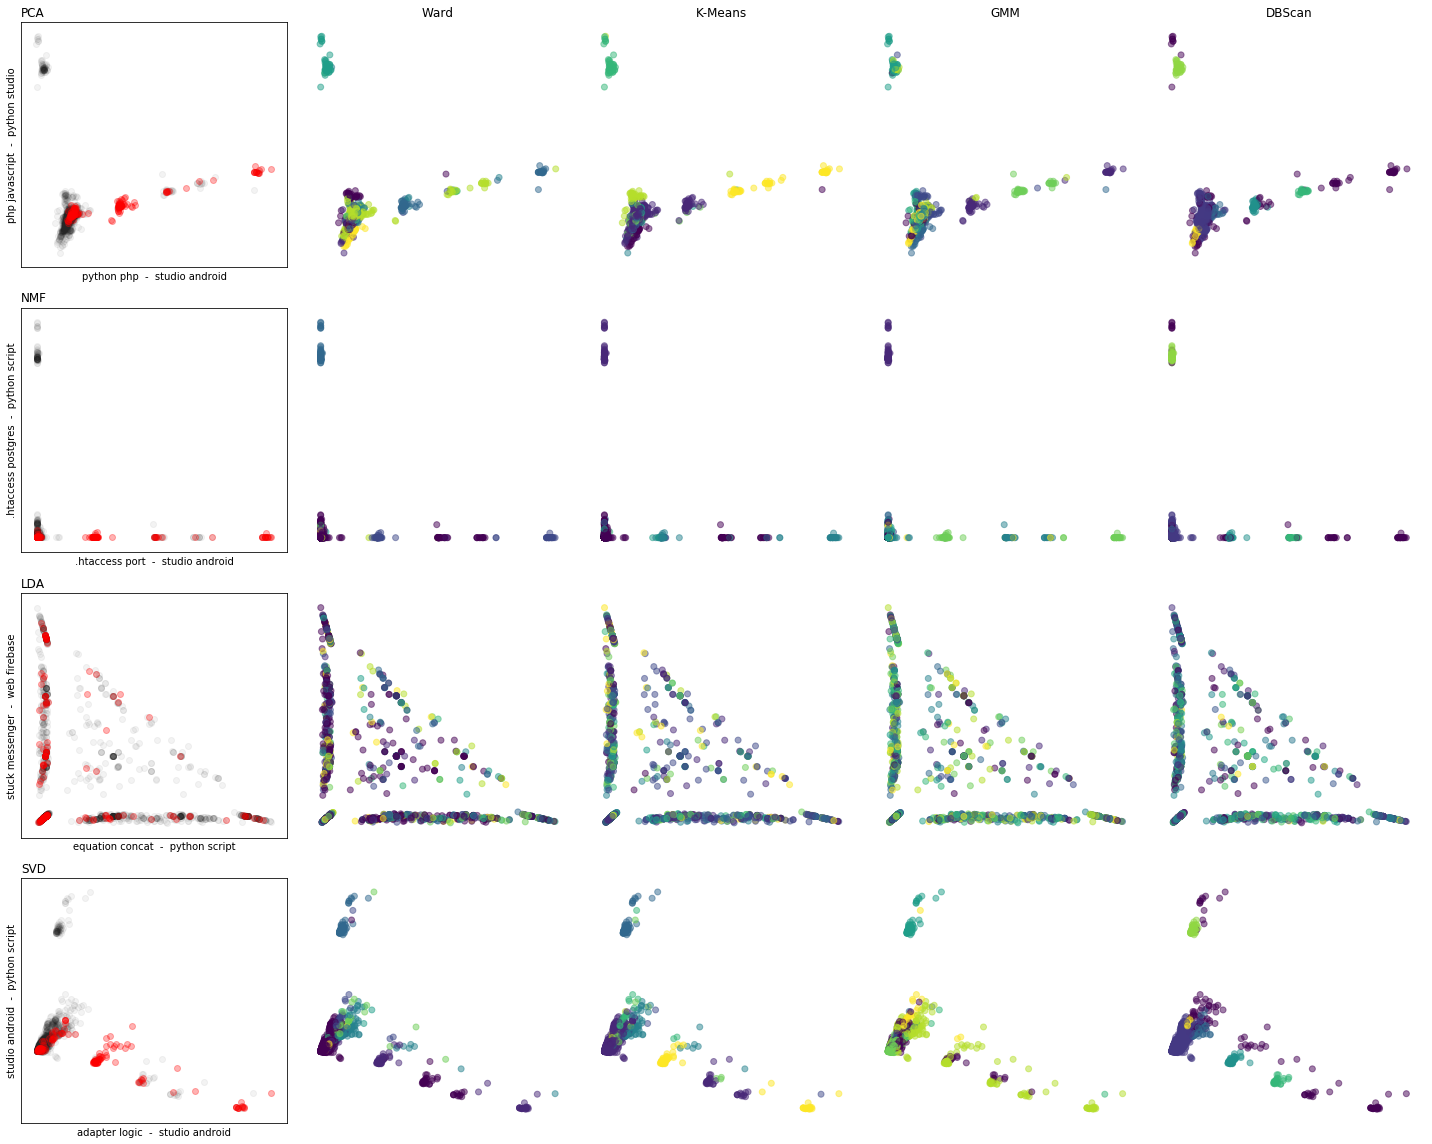

In [20]:
%matplotlib inline
import cluster
decompositions = ['PCA', 'NMF', 'LDA', 'SVD'] # PCA NMF LDA SVD FastICA FA Dict
algos = ['Ward', 'DBScan', 'K-Means', 'GMM']  # Ward K-Means GMM DBScan Affinity
cluster.run('stackoverflow/lemma/nltk/32/T/', decompositions, algos, 2000, 10, 25, 'android')

In [ ]:
find best matching cluster (maybe vary cluster count)

In [4]:
%matplotlib inline
import cluster
decompositions = ['PCA', 'NMF', 'LDA', 'SVD'] # PCA NMF LDA SVD FastICA FA Dict
algos = ['Ward', 'K-Means', 'GMM', 'DBScan']  # Ward K-Means GMM DBScan Affinity
#node.update ('11_title_body', decompositions, algos, 1000, 'sql')
cluster.runPlotly('11_title', decompositions, algos, 2000, 'android')


In [32]:
import numpy as np
import plotly.plotly as py
import pandas as pd

df2 = pd.DataFrame({
    'A' : 1.,
    'B' : pd.Timestamp('20130102'),
    'C' : pd.Series(1,index=list(range(4)), dtype='float32'),
    'D' : np.array([3] * 4, dtype='int32'),
    'E' : pd.Categorical(["test","train","test","train"]),
    'F' : 'foo' 
})

df2.style


# Hierarchical Clustering (ward)

TODO: write.<br> 
for each projection (svd, pca, lda) scipy.linkage(ward) algo <br>    
    --> for each node find decendantes, sum up raw tf, find top 3, safe tree

In [13]:
import hierarchy
hierarchy.run('stackoverflow/lemma/nltk/11/TIBC', ['PCA', 'LDA', 'SVD'], [3, 5, 7, 10, 16, 24], 'ground truth') # , 'LDA', 'PCA' , 20

dist/visualisations/hierarchies/PCA3-ward.d3.json
dist/visualisations/hierarchies/PCA5-ward.d3.json
dist/visualisations/hierarchies/PCA7-ward.d3.json
dist/visualisations/hierarchies/PCA10-ward.d3.json
dist/visualisations/hierarchies/PCA16-ward.d3.json
dist/visualisations/hierarchies/PCA24-ward.d3.json
dist/visualisations/hierarchies/LDA3-ward.d3.json
dist/visualisations/hierarchies/LDA5-ward.d3.json
dist/visualisations/hierarchies/LDA7-ward.d3.json
dist/visualisations/hierarchies/LDA10-ward.d3.json
dist/visualisations/hierarchies/LDA16-ward.d3.json
dist/visualisations/hierarchies/LDA24-ward.d3.json
dist/visualisations/hierarchies/SVD3-ward.d3.json
dist/visualisations/hierarchies/SVD5-ward.d3.json
dist/visualisations/hierarchies/SVD7-ward.d3.json
dist/visualisations/hierarchies/SVD10-ward.d3.json
dist/visualisations/hierarchies/SVD16-ward.d3.json
dist/visualisations/hierarchies/SVD24-ward.d3.json


In [18]:
%%HTML
<iframe width="100%" height="700" frameBorder="0"
    src="http://localhost:3002/dist/visualisations/tree.html?f=LDA24-ward"></frame>

# Install

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
#!gulp 

In [9]:
!pip3 install pandas

import plotly
plotly.tools.set_credentials_file(username='MichaelGlatzhofer', api_key='6fkzLsxb00TXcV1OmA52')

Traceback (most recent call last):
  File "/usr/bin/pip3", line 9, in <module>
    from pip import main
ImportError: cannot import name 'main'
